# West vs. East resuspension rate difference classification

Based on tidal speeds from Jacqui-Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import scipy.io

%matplotlib inline

###### Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

###### Load files:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

cond2      = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Load tidal speed array from Jacqui-Lee:

In [4]:
mat         = scipy.io.loadmat('/ocean/brogalla/GEOTRACES/data/mean_tide_speed.mat')
tidal_speed = mat['mean_speed']

ts_mesh     = nc.Dataset('/ocean/brogalla/GEOTRACES/data/hsquare.nc')
ts_lons     = np.array(ts_mesh.variables['nav_lon'])
ts_lats     = np.array(ts_mesh.variables['nav_lat'])

Load tidal forcing file:

In [6]:
tff = nc.Dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-20210310.nc')
erosion_rate = np.array(tff.variables['er_rate'])

##### Figures:

In [7]:
tidal_stress     = tidal_speed**2 
log_tidal_stress = np.log10(tidal_stress)

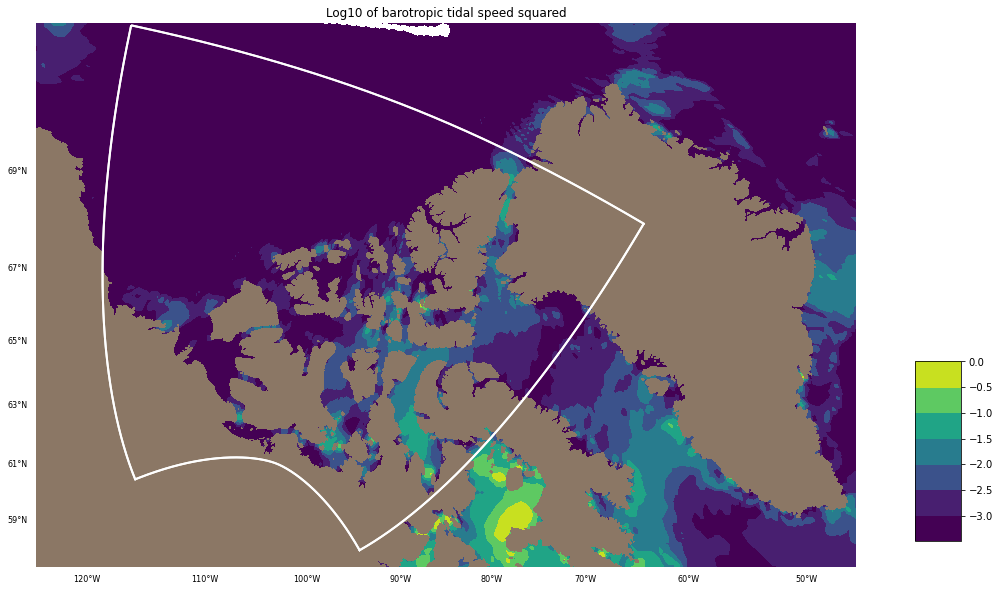

In [8]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[imin:imax,jmax],   y_sub[imin:imax,jmax]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmin],   y_sub[imin:imax,jmin]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax],   y_sub[imin,jmin:jmax]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax],   y_sub[imax,jmin:jmax]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'w-', lw=2.0, zorder=5)

# tidal speed:    ---------------------------------------------------------------------------
x_JL, y_JL = proj1(ts_lons, ts_lats)
CB = proj1.contourf(x_JL, y_JL, log_tidal_stress, vmin=-3, vmax=0, levels=[-12,-3, -2.5, -2, -1.5, -1, -0.5, 0])

ax1.set_title('Log10 of barotropic tidal speed squared')

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

In [9]:
log_erosion_rate = np.log10(erosion_rate)

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


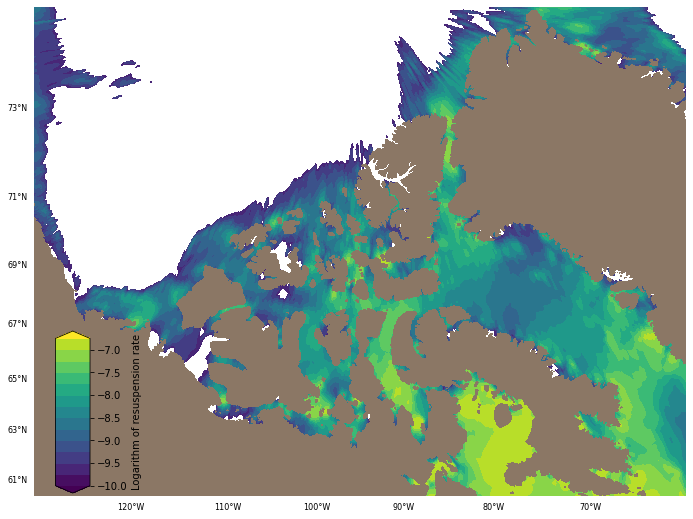

In [17]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-zoom.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

# tidal stress:
CB = proj1.contourf(x_sub, y_sub, log_erosion_rate, vmin=-10, vmax=-6.5, \
                    levels=np.arange(-10,-6.5,0.25), extend='both')

cbaxes = fig.add_axes([0.16, 0.13, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=np.arange(-10,-6.5,0.5), label='Logarithm of resuspension rate')

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A7-erosion-rate.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A7-erosion-rate.svg', bbox_inches='tight', dpi=300, \
            format='svg')

In [19]:
print('Units [g/m2/yr]')
print('Average erosion rate in domain: ', np.average(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)
print('Maximum erosion rate in domain: ', np.amax(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)
print('Minimum erosion rate in domain: ', np.amin(erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600)

Units [g/m2/yr]
Average erosion rate in domain:  137.18041071623088
Maximum erosion rate in domain:  4424.765338154094
Minimum erosion rate in domain:  0.0
